In [1]:
import music21 as m21
m21.humdrum.spineParser.flavors['JRP'] = True
import numpy as np
import subprocess
from score import getOnsets, parseMelody

In [2]:
def showIMA(s):
    s = s.stripTies()
    onsets = getOnsets(s)

    with subprocess.Popen(["onsets2ima","-onsets"] + [str(o) for o in onsets], stdout=subprocess.PIPE) as proc:
        output = proc.stdout.read().decode('ascii')
    
    ima_str = output.split('\n')[0].strip()
    ima_spect_str = output.split('\n')[1].strip()

    ima = [float(w) for w in ima_str.split(' ')]
    ima_spect = [float(w) for w in ima_spect_str.split(' ')]

    ima_spect = [ima_spect[o] for o in onsets]

    assert len(s.flat.notes) == len(ima)
    assert len(s.flat.notes) == len(ima_spect)

    ix = 0
    for n in s.flat.notes:
        if type(n.duration) != m21.duration.GraceDuration: #skip grace notes
            n.addLyric(str(ix))
            n.addLyric(onsets[ix])
            n.addLyric(round(ima[ix],2))
            n.addLyric(round(ima_spect[ix],2))
            n.addLyric(round(n.beatStrength,2))
            ix = ix+1
    
    s.show()
    

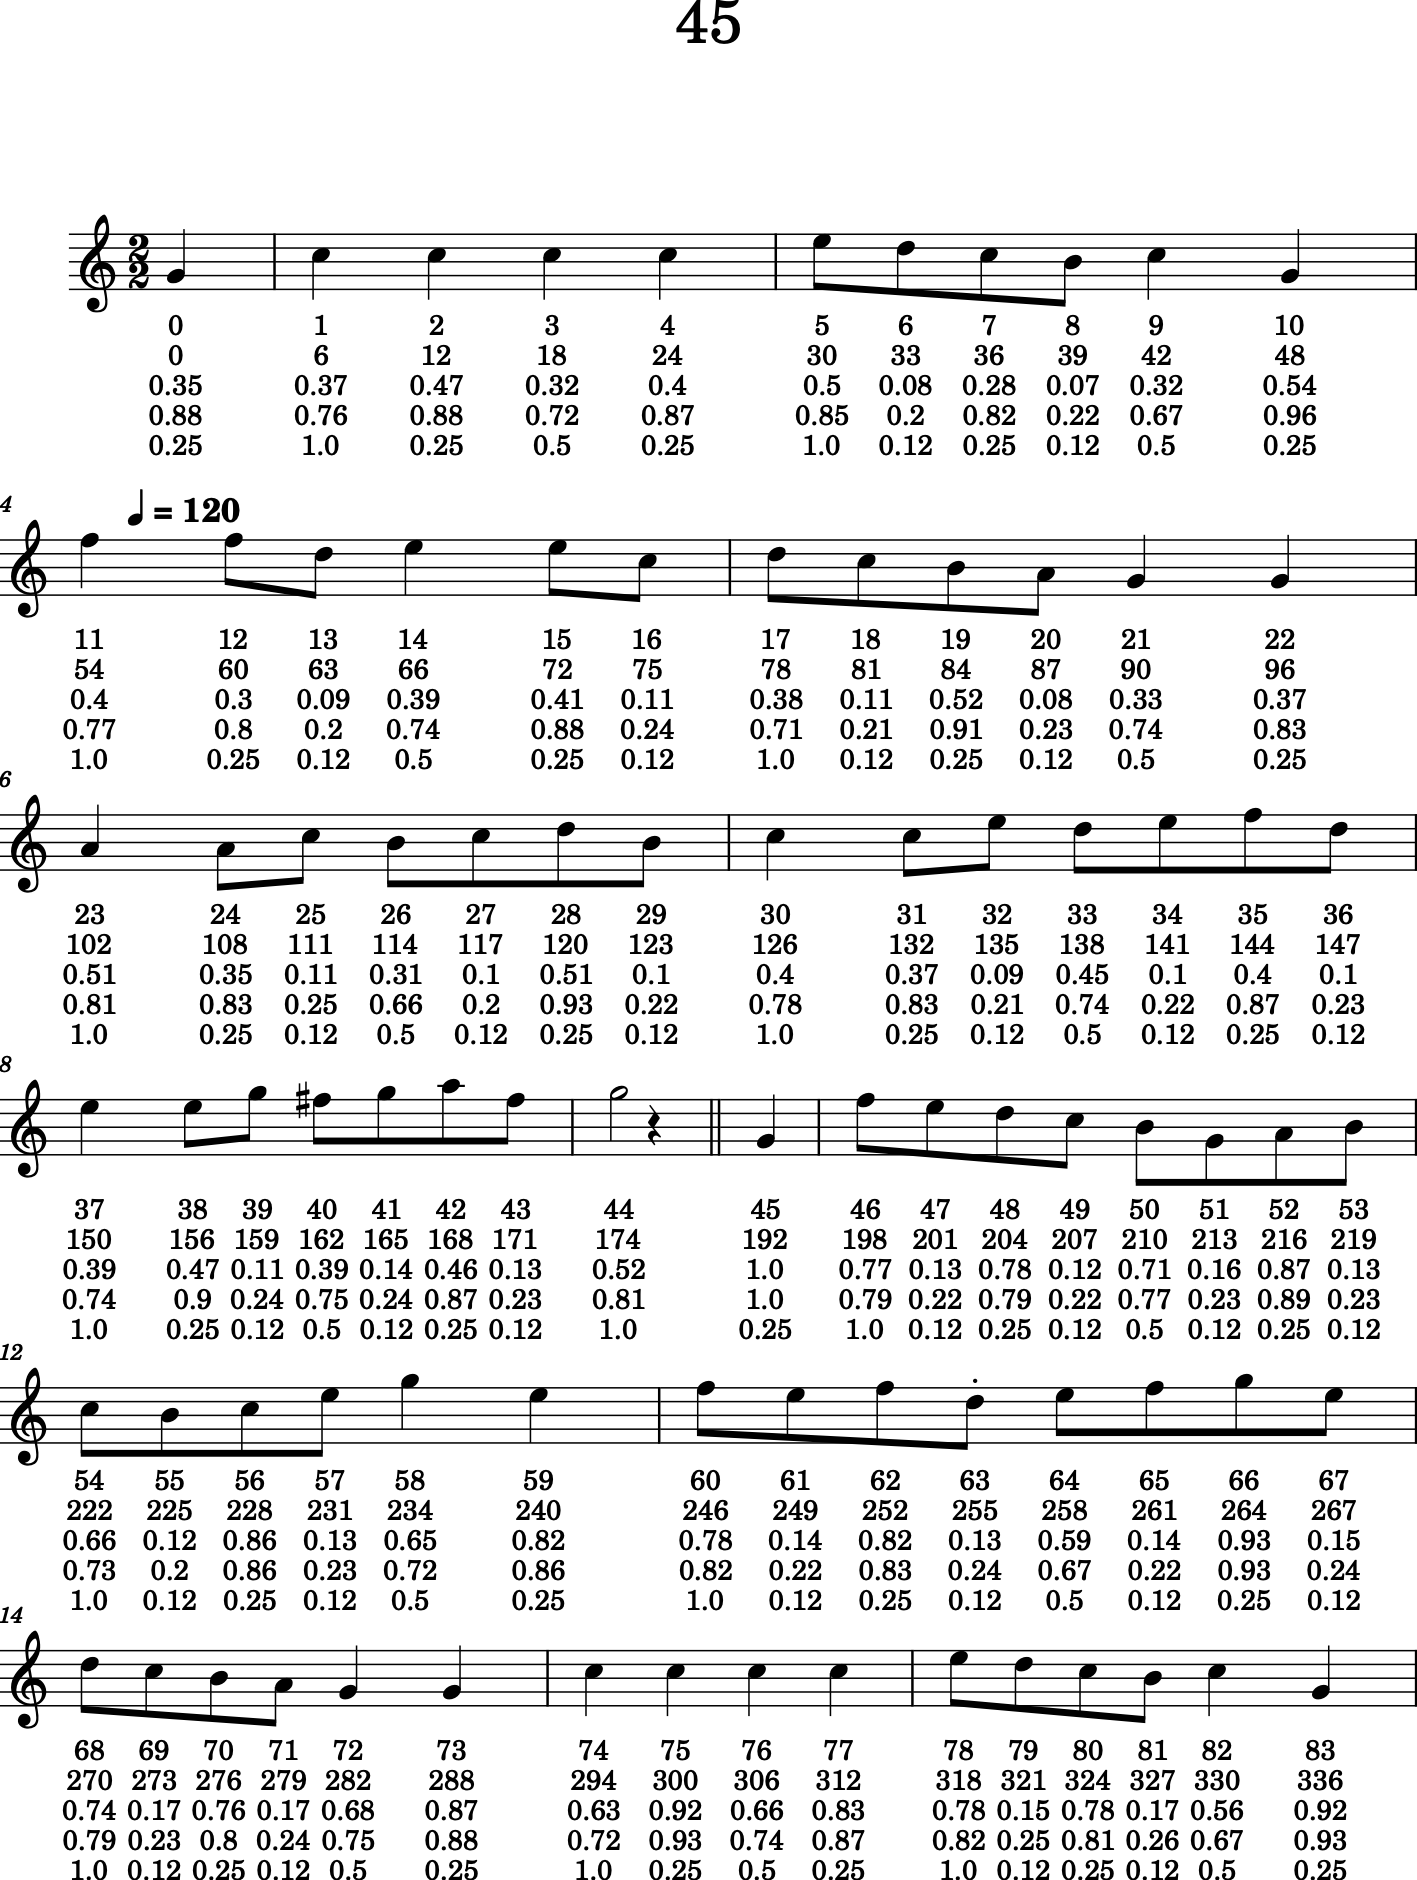

In [3]:
nlbid = "NLB147030_01"
song = parseMelody('/Users/krane108/data/MTC/MTC-FS-INST-2.0/krn/'+nlbid+'.krn')

showIMA(song)

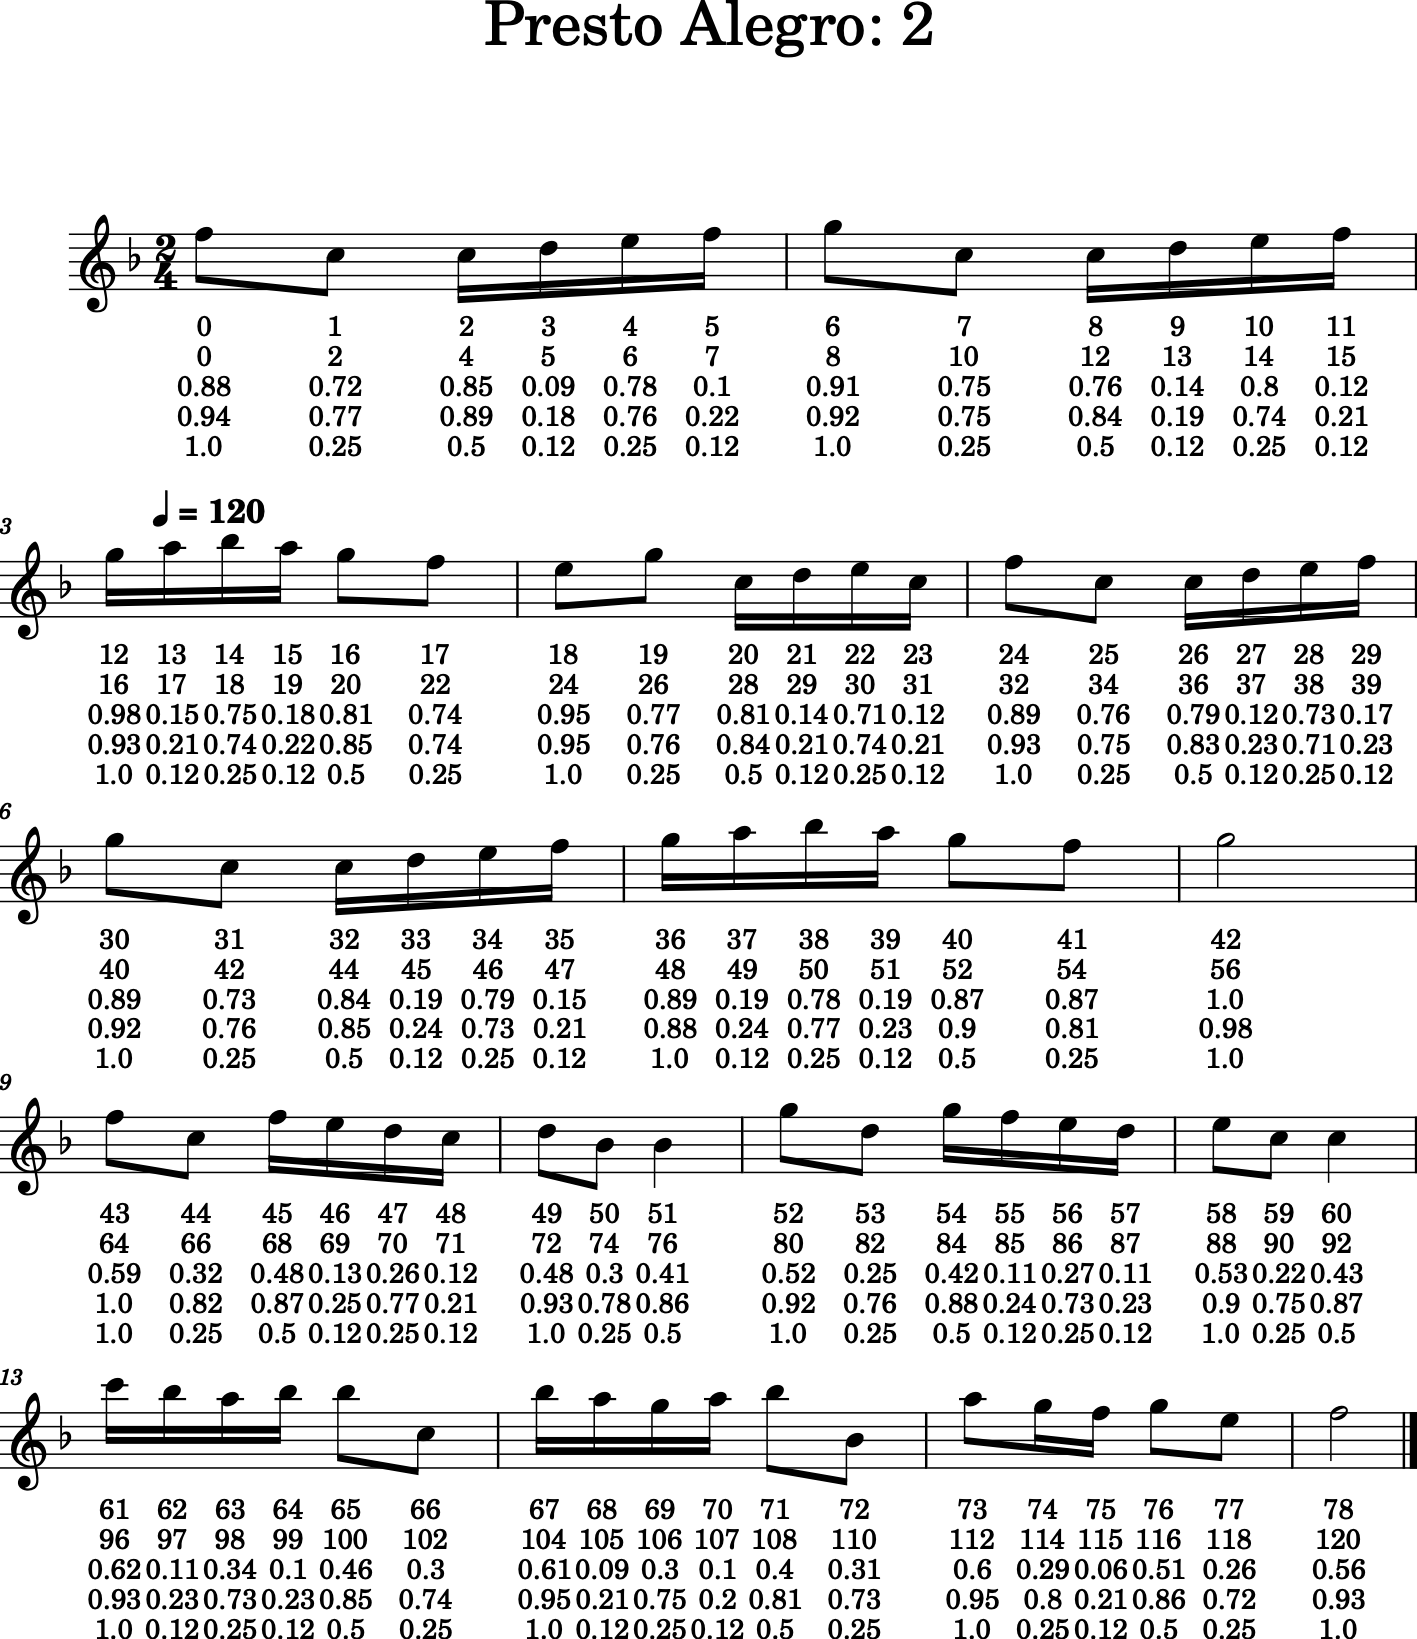

In [10]:
song2 = m21.converter.parse('/Users/krane108/data/MTC/MTC-FS-INST-2.0/krn/NLB183427_01.krn')
showIMA(song2)

In [3]:
from MTCFeatures import MTCFeatureLoader
fl = MTCFeatureLoader('MTC-FS-INST-2.0')
seq_iter = fl.applyFilter(('inNLBIDs', ['NLB150976_01']))

In [4]:
for s in seq_iter:
    pitch = s['features']['pitch']
    imaw = s['features']['imaweight']

In [11]:
ix = 0
for n in song.flat.notes:
    if type(n.duration) != m21.duration.GraceDuration: #skip grace notes
        n.addLyric(imaw[ix])
        n.addLyric(pitch[ix])
        n.addLyric(n.beatStrength)
        ix = ix+1


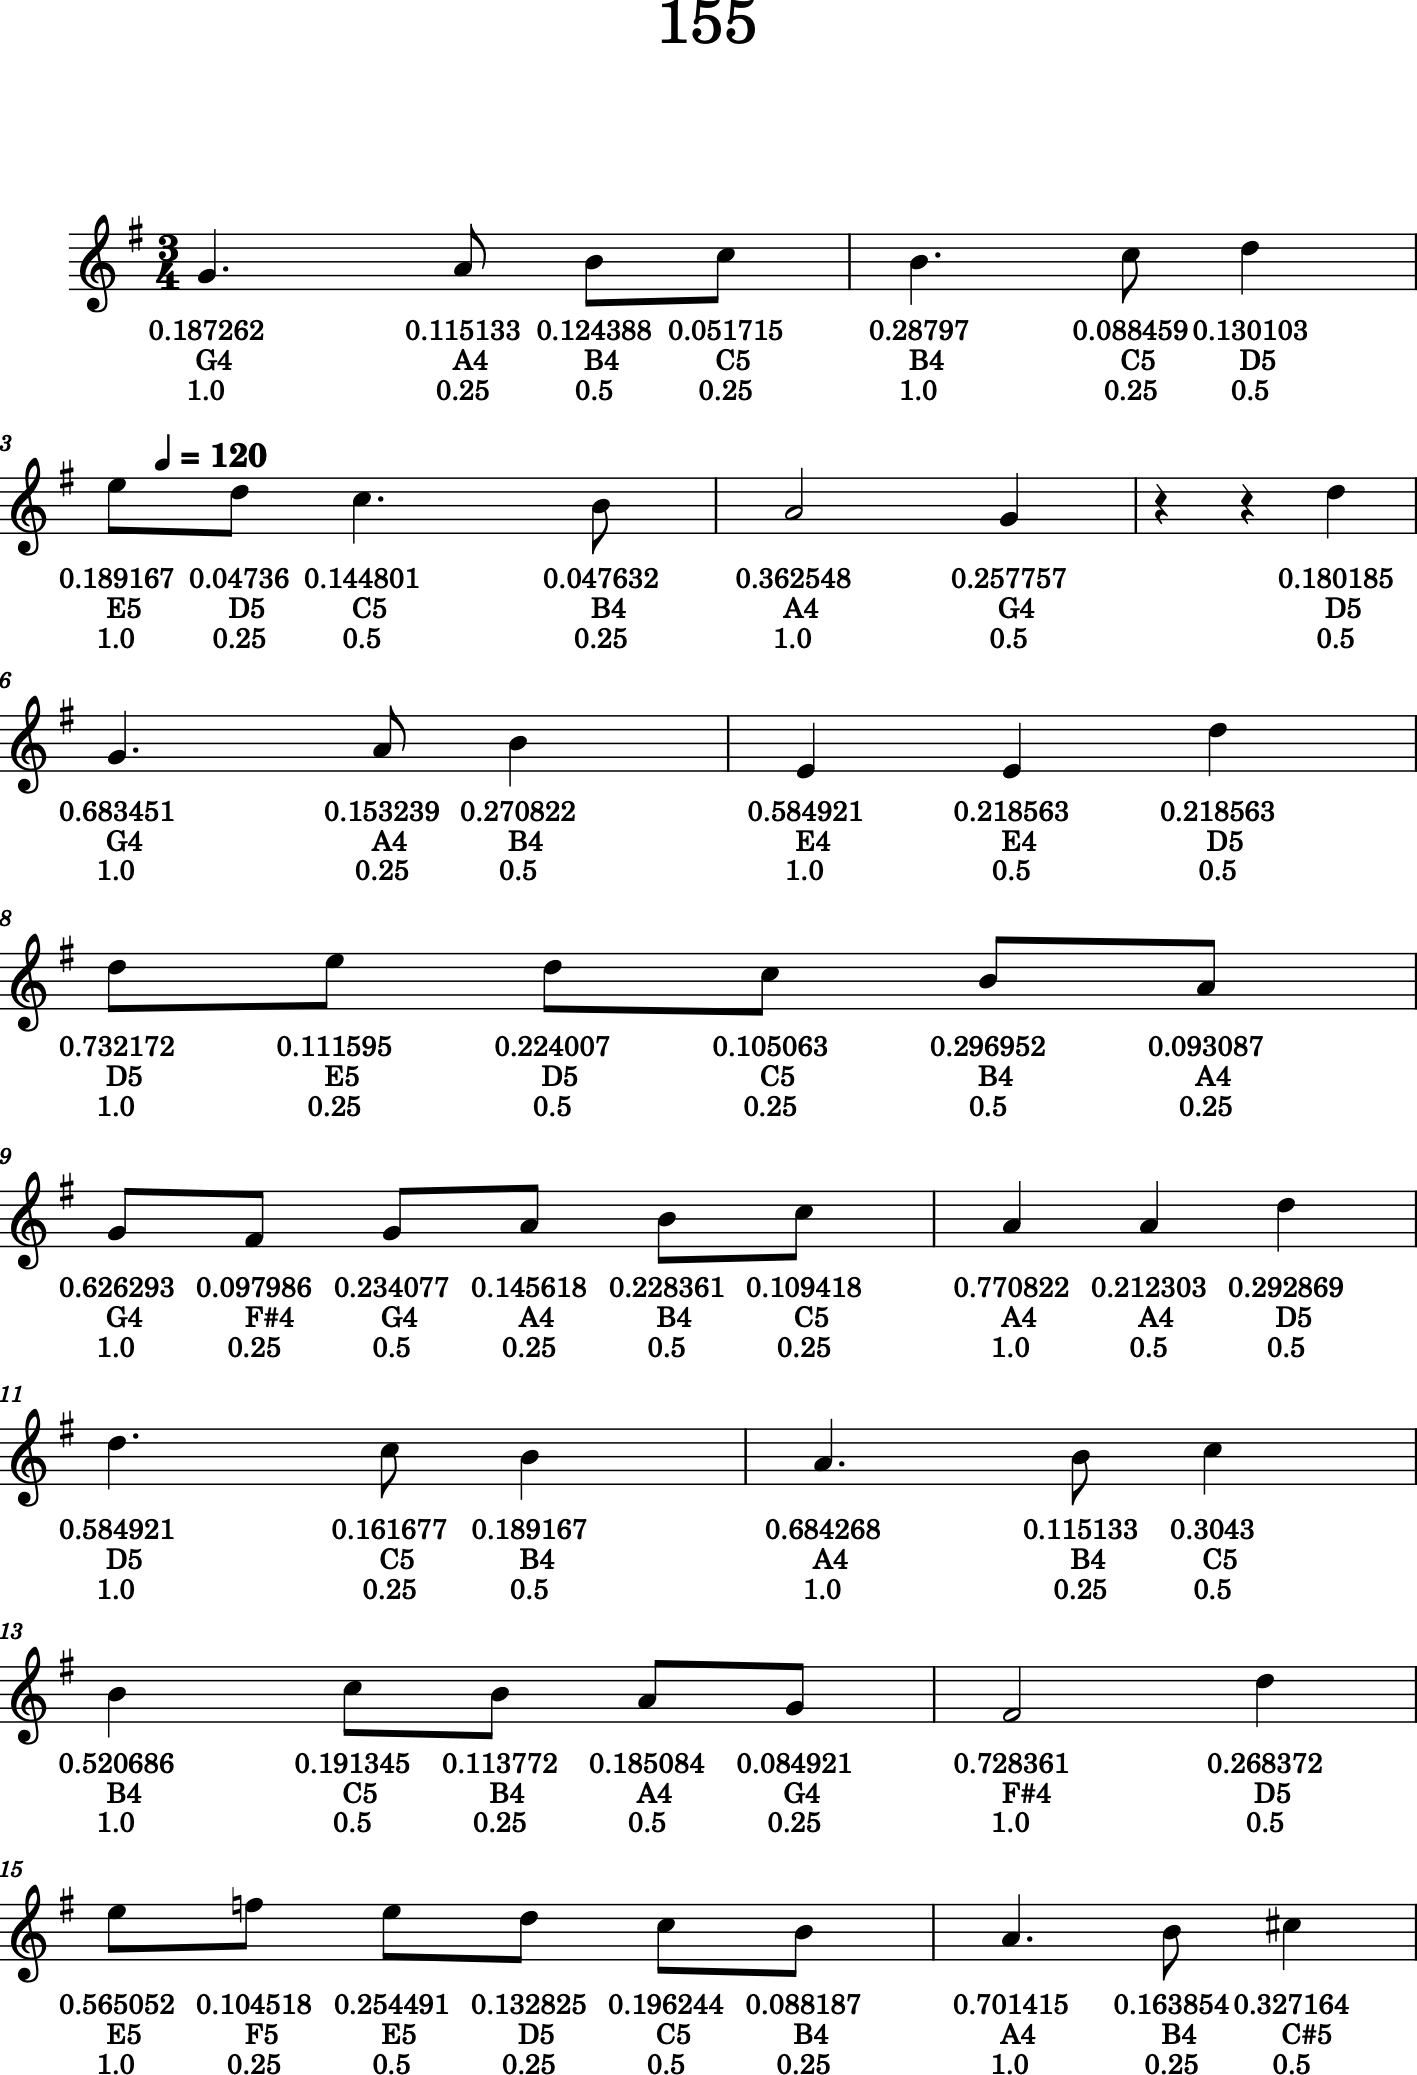

In [12]:
song.show()
